In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [15]:
 # Loading data from the mnist dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [16]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


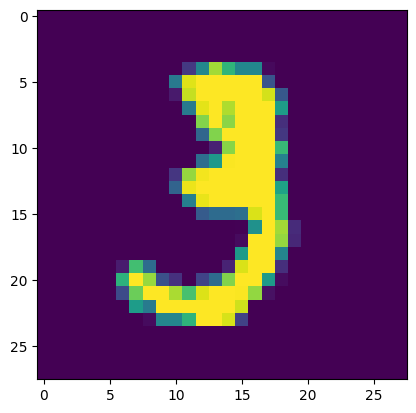

3


In [17]:
#displaying the image

plt.imshow(X_train[10])
plt.show()
print(Y_train[10])

In [18]:
# finding the unique values in Y_train and Y_test
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [19]:
# scaling the values

X_train= X_train/255
X_test= X_test/255

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the neural network**

In [20]:
# defining the layers of the Neural network

model= keras.Sequential ([
                          keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(50, activation='relu'),
                         keras.layers.Dense(50, activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')])


In [21]:
#compiling the neural network

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
# training the neural network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2994 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1387 - accuracy: 0.9590
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1019 - accuracy: 0.9692
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0808 - accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0677 - accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0489 - accuracy: 0.9842
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0448 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0381 - accuracy: 0.9878
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

**The training data accuracy is 98.90%**

In [23]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1030 - accuracy: 0.9727
0.1030176654458046
0.9726999998092651


**The test data accuracy is 97.27 %**

In [24]:
Y_pred =model.predict(X_test)
print(Y_pred.shape)
print(Y_pred[0])
print(Y_test[0])

313/313 [==============================] - 1s 1ms/step
(10000, 10)
[1.3000222e-05 1.8310381e-04 6.3922264e-02 8.9659798e-01 2.9272374e-05
 1.3494510e-03 1.7847973e-09 9.9999535e-01 1.3463937e-01 3.3698818e-01]
7


In [25]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test = true labels

Y_pred_labels = predicted labels

In [26]:
# building the confusion matrix
con_mat =confusion_matrix(Y_test, Y_pred_labels)
print(con_mat)

tf.Tensor(
[[ 957    0    1    2    2    8    2    1    5    2]
 [   0 1123    2    1    0    3    1    0    5    0]
 [   3    2 1002    8    3    0    2    5    7    0]
 [   0    0    4  981    0   11    0    6    6    2]
 [   0    1    4    0  961    3    4    1    0    8]
 [   0    0    0    8    2  872    2    0    5    3]
 [   3    3    2    1    9   13  921    0    5    1]
 [   1    4    8    0    3    2    0 1004    3    3]
 [   0    2    2    8    5   10    1    4  939    3]
 [   2    3    0    5   20    3    2    5    2  967]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

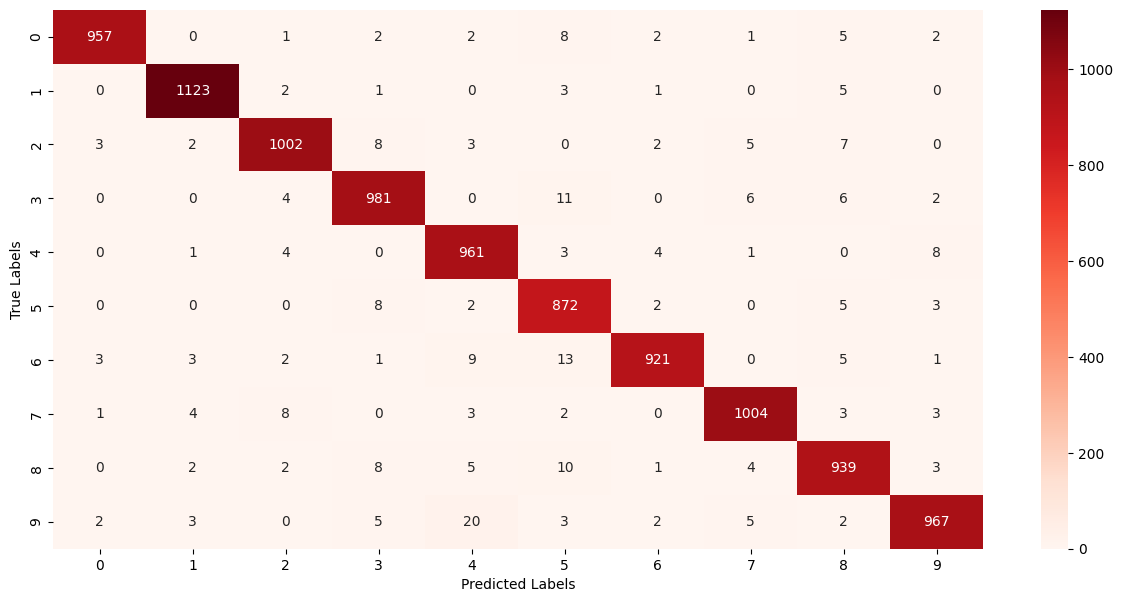

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a predictive system**

In [28]:
input_img_path = '/content/drive/MyDrive/Colab Notebooks/test images/test image.png'

input_image =cv2.imread(input_img_path)

In [29]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


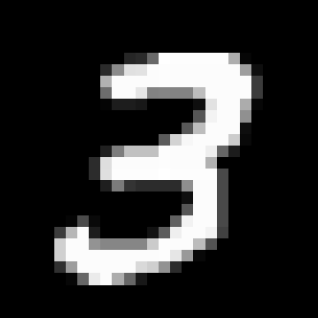

In [30]:
cv2_imshow(input_image)

In [31]:
# conversion to grey scale image

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(318, 318)

In [32]:
# resizing the image

input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize.shape


(28, 28)

In [33]:
# scaling the image

input_image_resize = input_image_resize/255

In [34]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [35]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 21ms/step
[[4.7123121e-11 3.8065300e-05 3.7740243e-05 1.0000000e+00 7.2338226e-11
  2.3657484e-03 8.0812128e-12 3.6822995e-03 4.2517972e-01 1.5477009e-02]]


In [36]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3
